In [1]:
import pandas as pd
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 100

mpl.rcParams['font.family'] = 'serif'

# Integrating areas

In this notebook, I will integrate the area under the type 3 vertex population curve for the rising window and the decreasing one, then I will perform the substraction of both. I will perform this process for all the mT/s rates computed. So, the objective of this notebook is to have A_{rising}-A_{decresing} vs increasing(decreasing) mT/s rate. 

### 1. Importing the data

In [3]:
Data_path = "/home/carolina/Dropbox/BidisperseColloidalIce_PROJECT"

In [4]:
dec = pd.read_csv('type3_dec.dat', sep = "\t", index_col = [0,1])
inc = pd.read_csv('type3_inc.dat', sep = "\t", index_col = [0,1])

In [5]:
dec_def = dec.dropna()

In [6]:
dec.index.get_level_values(0).unique()

Float64Index([0.009483, 0.05, 0.1, 0.5, 1.0], dtype='float64', name='change_m_time')

In [7]:
inc

type      mean       err
change_m_time field                                 
0.009483      0.000000    Type 3  0.121250  0.006250
              4.081633    Type 3  0.118750  0.003750
              8.163265    Type 3  0.116250  0.003750
              12.244898   Type 3  0.139286  0.011143
              16.326531   Type 3  0.147655  0.006798
...                          ...       ...       ...
1.000000      183.673469  Type 3  0.438041  0.012152
              187.755102  Type 3  0.435864  0.012672
              191.836735  Type 3  0.433687  0.013399
              195.918367  Type 3  0.432000  0.014085
              200.000000  Type 3  0.432000  0.014085

[250 rows x 3 columns]

In [8]:
dec_data = dec_def.groupby('change_m_time')
inc_data = inc.groupby('change_m_time')
a = []
b = []
t = []
for i, (n, gr) in enumerate(dec_data):
    a.append(integrate.trapz(gr['mean'],gr.index.get_level_values('field')))
    t.append(i)
    
for i_inc, (n_inc, gr_inc) in enumerate(inc_data):
    b.append(integrate.trapz(gr_inc['mean'],gr_inc.index.get_level_values('field')))

In [9]:
b

[63.66078717201167,
 57.546980424823,
 57.684464806330695,
 56.36144661946412,
 55.91418159100375]

In [10]:
a

[85.13546438983755,
 77.69110787172012,
 70.78877551020409,
 56.08804664723032,
 56.48096626405663]

In [11]:
c = []
for i in range(len(a)):
    print((b[i]-a[i]))
    c.append(b[i]-a[i])

-21.474677217825878
-20.144127446897123
-13.104310703873395
0.273399972233797
-0.5667846730528865


In [12]:
#d = [0.0095,0.0145,0.0195,0.0245,0.0295,0.0395,0.0445,0.0495,0.0543,0.0595]
d = [0.0095,0.05,0.1,0.5,1]

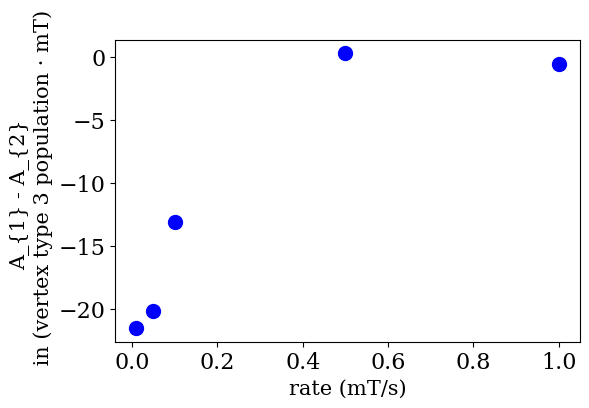

In [13]:
plt.plot(d, c, 'o', markersize = 10, color = 'b')
plt.ylabel('A_{1} - A_{2} \n in (vertex type 3 population · mT)', size = 15, fontfamily = 'serif')
plt.xlabel('rate (mT/s)', size = 15)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=16) 
#plt.savefig('Areas_vs_rate', bbox_inches='tight')

# Computing errors

In [14]:
dec = pd.read_csv('type3_dec.dat', sep = "\t", index_col = [0,1])
inc = pd.read_csv('type3_inc.dat', sep = "\t", index_col = [0,1])

In [15]:
dec_def = dec.dropna()

In [16]:
dec_def['max'] = dec_def['mean'] + dec_def['err']
inc['max'] = inc['mean'] + inc['err']

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
inc

type      mean       err       max
change_m_time field                                           
0.009483      0.000000    Type 3  0.121250  0.006250  0.127500
              4.081633    Type 3  0.118750  0.003750  0.122500
              8.163265    Type 3  0.116250  0.003750  0.120000
              12.244898   Type 3  0.139286  0.011143  0.150429
              16.326531   Type 3  0.147655  0.006798  0.154452
...                          ...       ...       ...       ...
1.000000      183.673469  Type 3  0.438041  0.012152  0.450193
              187.755102  Type 3  0.435864  0.012672  0.448536
              191.836735  Type 3  0.433687  0.013399  0.447086
              195.918367  Type 3  0.432000  0.014085  0.446085
              200.000000  Type 3  0.432000  0.014085  0.446085

[250 rows x 4 columns]

In [18]:
dec_data = dec_def.groupby('change_m_time')
inc_data = inc.groupby('change_m_time')
d_m = []
i_m = []
t = []
for i, (n, gr) in enumerate(dec_data):
    d_m.append(integrate.trapz(gr['max'],gr.index.get_level_values('field')))
    t.append(i)
    
for i_inc, (n_inc, gr_inc) in enumerate(inc_data):
    i_m.append(integrate.trapz(gr_inc['max'],gr_inc.index.get_level_values('field')))

In [19]:
d_m

[89.96782590587253,
 79.81192426617412,
 73.39589375791248,
 58.70041793661907,
 58.79959384484767]

In [20]:
i_m

[66.85213799805635,
 59.123133041892736,
 59.964021666426355,
 57.95451141895516,
 57.26049345623939]

In [21]:
c_max = []
for i in range(len(d_m)):
    print((i_m[i]-d_m[i]))
    c_max.append(i_m[i]-d_m[i])

-23.11568790781618
-20.68879122428138
-13.43187209148612
-0.7459065176639115
-1.5391003886082828


In [22]:
err = []
for i in range(len(c)):
    print()
    err.append(c_max[i]-c[i])

In [23]:
err

[-1.6410106899903028,
 -0.5446637773842582,
 -0.32756138761272524,
 -1.0193064898977084,
 -0.9723157155553963]

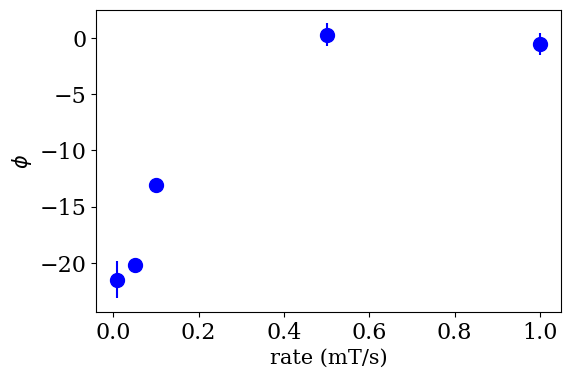

In [24]:
plt.errorbar(d, c,yerr = err, fmt = 'o', markersize = 10, color = 'b')
plt.ylabel('$\phi$', size = 15, fontfamily = 'serif')
plt.xlabel('rate (mT/s)', size = 15)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=16) 
plt.savefig('Areas_vs_rate', bbox_inches='tight')

In [25]:
import pandas as pd

In [26]:
d = {'rate': d, 'phi': c, 'err phi':err }

df = pd.DataFrame(data=d)

df

,rate,phi,err phi
0,0.0095,-21.474677,-1.641011
1,0.0500,-20.144127,-0.544664
2,0.1000,-13.104311,-0.327561
3,0.5000,0.273400,-1.019306
4,1.0000,-0.566785,-0.972316


In [27]:
df.to_csv('phi_vs_rate.dat', sep = '\t')